# Brain Tumor Classification

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, MaxPooling2D, Dense, Flatten
%matplotlib inline

In [7]:
# Building model
classifier = Sequential()

classifier.add(Convolution2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)))
classifier.add(MaxPooling2D(2,2))

classifier.add(Convolution2D(100, (3,3), activation='relu'))
classifier.add(MaxPooling2D(2,2))

classifier.add(Flatten())
classifier.add(Dropout(0.5))

classifier.add(Dense(50, activation='relu'))
classifier.add(Dense(4, activation='softmax'))

In [8]:
# Model Summary
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 100)     2800      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 100)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 100)       90100     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 129600)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 129600)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)               

In [9]:
# Compiling the model
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
# Loading data and Image Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory('dataset/Training', 
                                                    batch_size=10, 
                                                    target_size=(150, 150))
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory('dataset/Testing', 
                                                         batch_size=10, 
                                                         target_size=(150, 150))

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [11]:
# Model Checkpointing
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [12]:
# Training Model
history = classifier.fit(train_generator,
                                   epochs=10,
                                   validation_data=validation_generator,
                                   callbacks=[checkpoint],)

Epoch 1/10
287/287 [==============================] - ETA: 0s - loss: 0.4211 - accuracy: 0.5927WARNING:tensorflow:From h:\Programs\Anaconda\envs\data-science\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model2-001.model\assets
287/287 [==============================] - 139s 486ms/step - loss: 0.4211 - accuracy: 0.5927 - val_loss: 0.8500 - val_accuracy: 0.3477
Epoch 2/10
287/287 [==============================] - 148s 517ms/step - loss: 0.2459 - accuracy: 0.7916 - val_loss: 0.8368 - val_accuracy: 0.4518
Epoch 3/10
287/287 [==============================] - 133s 463ms/step - los

Text(0.5, 1.0, 'Accuracy Curve')

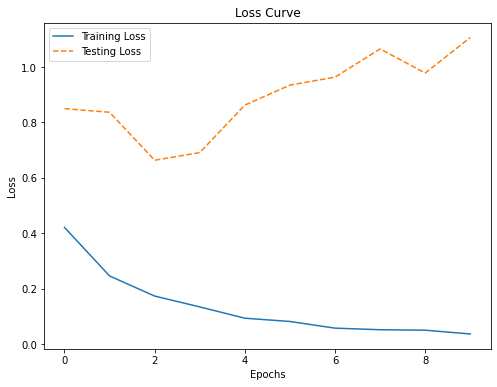

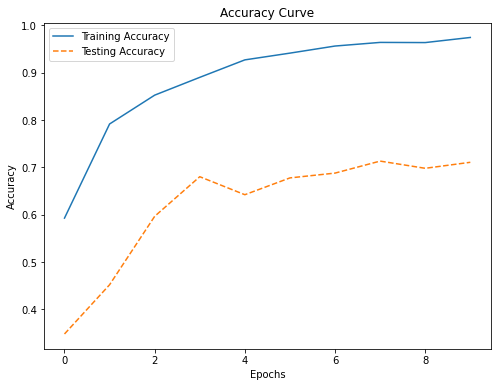

In [13]:
# Loss Curves
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],ls='--')
plt.legend(['Training Loss','Testing Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Curve")

# Accuracy Curves
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],ls='--')
plt.legend(['Training Accuracy','Testing Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy Curve")

In [14]:
# Model Evaluation
classifier.evaluate(validation_generator)

40/40 [==============================] - 4s 109ms/step - loss: 1.1069 - accuracy: 0.7107


[1.1068788766860962, 0.710659921169281]